In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
linear = pd.read_csv("Linear.csv")
linear.head()

,X1,X2,Class
0,15,50,Pos
1,20,25,Pos
2,17,75,Pos
3,15,25,Pos
4,19,51,Pos


In [3]:
nonlinear = pd.read_csv("Non Linear.csv")
nonlinear.head()

,X1,X2,Class
0,11,25,Pos
1,9,26,Pos
2,4,49,Pos
3,4,60,Pos
4,3,75,Pos


In [4]:
def plot(data):
    plt.scatter(data[data["Class"] == "Pos"]["X1"], data[data["Class"] == "Pos"]["X2"], label = "Positive", color = "green")
    plt.scatter(data[data["Class"] == "Neg"]["X1"], data[data["Class"] == "Neg"]["X2"], label = "Positive", color = "red")
    plt.legend(loc = "best")
    plt.show()

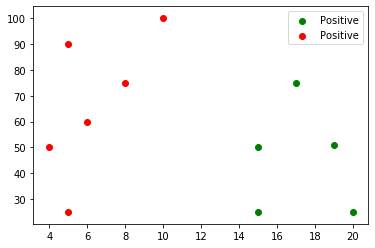

In [5]:
plot(linear)

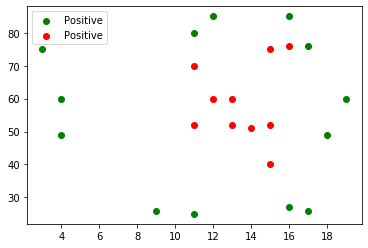

In [6]:
plot(nonlinear)

In [7]:
from sklearn import svm

In [22]:
X = linear.iloc[:,:2].values
y = linear.Class.map({"Pos":0, "Neg":1})

In [23]:
X

array([[ 15,  50],
       [ 20,  25],
       [ 17,  75],
       [ 15,  25],
       [ 19,  51],
       [ 10, 100],
       [  8,  75],
       [  5,  25],
       [  4,  50],
       [  6,  60],
       [  5,  90]])

In [34]:
clf = svm.SVC(kernel = "linear")
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [35]:
def make_meshgrid(x,y,h = 0.02):
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    return xx, yy

In [36]:
xx,yy = make_meshgrid(X[:,0],X[:,1])

In [37]:
xx.shape

(3850, 900)

In [38]:
xx.ravel()

array([ 3.  ,  3.02,  3.04, ..., 20.94, 20.96, 20.98])

In [39]:
np.c_[ xx.ravel(),yy.ravel()]

array([[  3.  ,  24.  ],
       [  3.02,  24.  ],
       [  3.04,  24.  ],
       ...,
       [ 20.94, 100.98],
       [ 20.96, 100.98],
       [ 20.98, 100.98]])

In [42]:
def plot_cont(xx,yy,clf,axis):
    Z = clf.predict(np.c_[ xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plot = axis.contourf(xx,yy,Z, cmap = plt.cm.coolwarm)
    return plot

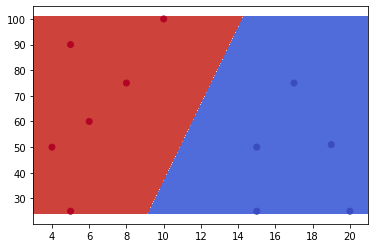

In [44]:
figure,axis = plt.subplots(1,1)
plot = plot_cont(xx,yy,clf,axis)
axis.scatter(X[:,0], X[:,1], c = y , cmap = plt.cm.coolwarm)
plt.show()

In [45]:
X = nonlinear.iloc[:,:2].values
y = nonlinear.Class.map({"Pos":0, "Neg":1})

clf2 = svm.SVC()
clf2.fit(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


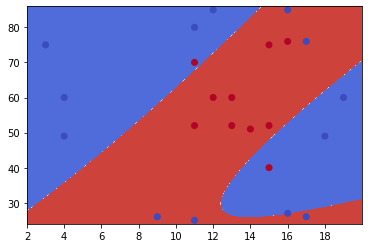

In [48]:
X = nonlinear.iloc[:,:2].values
y = nonlinear.Class.map({"Pos":0, "Neg":1})

clf2 = svm.SVC(kernel = "poly", degree = 3)
clf2.fit(X,y)

figure,axis = plt.subplots(1,1)
xx,yy = make_meshgrid(X[:,0],X[:,1])
plot = plot_cont(xx,yy,clf2,axis)
axis.scatter(X[:,0], X[:,1], c = y , cmap = plt.cm.coolwarm)
plt.show()